# Problem Statement: Insurance Cost Prediction/ Medical Insurance Cost Prediction

- We have seen many advertise regarding health insurance in our tv ads or online ads.
- In a black box health insurance company can only make money if it collects ore than it spends on the medical care of its beneficiaries.
- we will determine whatis the most important variable that is influencing insurance cost.
- these estimates could be used to create actuarial tables that set the price of yearly 
    -premimums higher
    - lower ,
according to the expected treatment costs.
- Here in these scenario medical cost are difficult to predict since most money comes from rare conditions of patients.


- The objective of this article is to accurtaely predict insurance costs based on people's data,including :
  - age, sex,bmi,children,smoker,region,charges
  
## we got these features:
- age: age of the primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body Mass Index, providing an understanding of body weights that are 
    - relatively high or low relative to height, 
    - objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance, number of dependents
- smoker: smoking or not
- region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance

### Since we are predicting insurance costs, charges will be our target feature.



### This is a regression problem

# Steps to be performed
- importing Libraries
- importing Dataset
- EDA(Exploratory Data analysis
- encoding the categorical values to numerical value
- splitting the data for training and testing
- model training
- model evaluation
- Building predictive System
- Conclusion

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing datasets

In [2]:
#converting the csv file to pandas..
insurance_dataset=pd.read_csv(r'C:\Users\sandi\Insurance_cost_predictions\datasets_for_insurance_cost_prediction.csv')

In [3]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#to check the first 5 rows
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#to check the last 5 rows
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# to check the number of (rows , columns)
insurance_dataset.shape

(1338, 7)

In [7]:
# to get the information 
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- categorical data
   - sex
   - smoker
   - region
- numerical data
   - age
   - bmi
   - children
   - charges

In [8]:
# to check the statistical values 
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory data analysis

In [9]:
#checking the missing values
insurance_dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
#checking the total missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### no missing value found!!!!!

In [11]:
# to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# univariant analysis

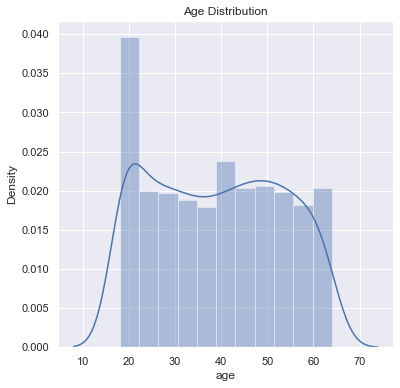

In [12]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

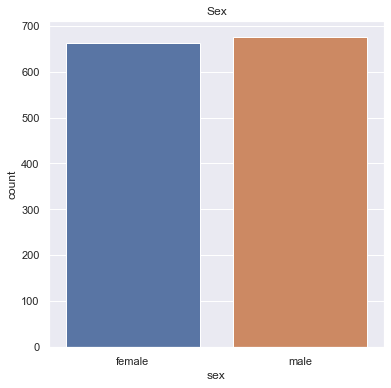

In [13]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex')
plt.show

# value count
- syntax: Series.value_counts()
- The value_counts() function returns a Series that contain counts of unique values. 
- It returns an object that will be in descending order so that its first element will be the most frequently-occurred element

In [14]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

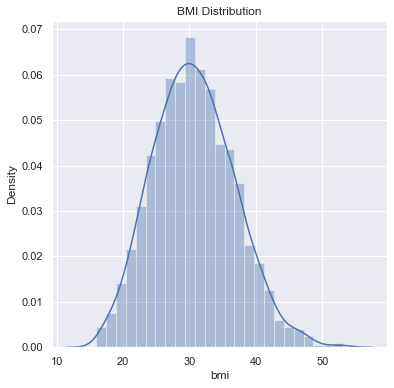

In [15]:
# distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

#### Normal BMI Range-->18.5 to 24.9

<function matplotlib.pyplot.show(close=None, block=None)>

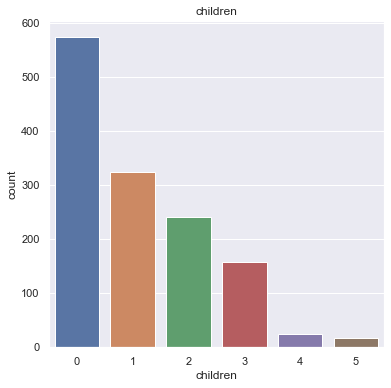

In [16]:
# distribution for children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

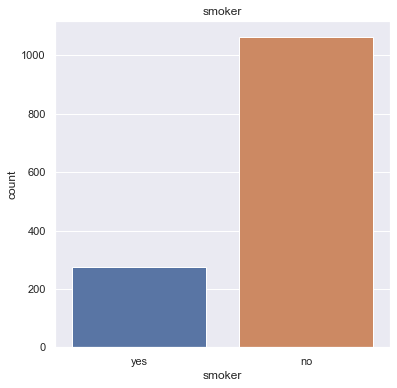

In [18]:
#distribution for smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show

In [19]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

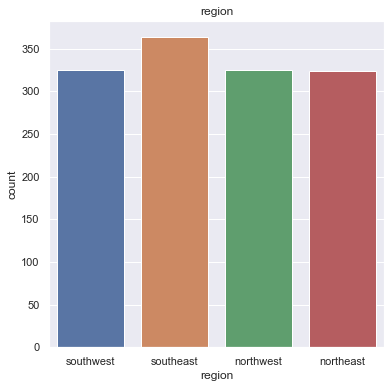

In [20]:
#distribution for region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show

In [21]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### encoding categorical value to numerical value

In [22]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [23]:
#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [24]:
#encoding sex column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

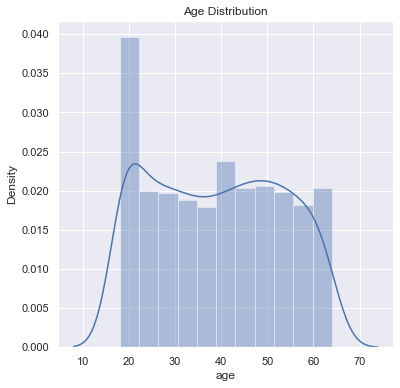

In [25]:
#distributon of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [26]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [27]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# splitting the data for training and testing


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# model training

as mentioned above its a regression problem we will be using linear regression.

# Linear regression

In [33]:
# loading the Linear Regression model
LR=LinearRegression()

In [34]:
LR.fit(x_train,y_train)

LinearRegression()


# model evaluation


In [35]:
# prediction on training data
training_data_prediction=LR.predict(x_train)

In [36]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R squared value :", r2_train)

R squared value : 0.751505643411174


# Building predictive system

In [38]:
# for building a predictive system we need to give input
# here as an user i have given
# age=31,sex=1,BMI=25.74,children=0,smoker=1,region=0
input_data=(31,1,25.74,0,1,0)
#changing inpit_data to a numpy array
input_data_as_numpy_array=np.array(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=LR.predict(input_data_reshaped)
print(prediction)
print("the insurance cost is USD: ",prediction[0])

[3760.0805765]
the insurance cost is USD:  3760.0805764960496


# Conclusion

- The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. 

- If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.

